# 1. Import Pandas and Numpy

In [61]:
import numpy as np
import pandas as pd

import os
import warnings
warnings.filterwarnings("ignore")

# 2. Pengenalan Dataset dan Target Value

In [62]:
os.listdir()

['.ipynb_checkpoints',
 'lc_2016_2017.csv',
 'lc_loan.csv',
 'new.html',
 'Opening Dataset, Target Variable, dan Missing Values.ipynb',
 'us-state-codes.csv']

In [63]:
loan_data = pd.read_csv('lc_2016_2017.csv')

In [64]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,...,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,...,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,...,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,...,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,...,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [65]:
loan_data.shape

(652853, 72)

In [66]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652853 entries, 0 to 652852
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           652853 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    652853 non-null  int64  
 3   funded_amnt                  652853 non-null  int64  
 4   funded_amnt_inv              652853 non-null  float64
 5   term                         652853 non-null  object 
 6   int_rate                     652853 non-null  float64
 7   installment                  652853 non-null  float64
 8   grade                        652853 non-null  object 
 9   sub_grade                    652853 non-null  object 
 10  emp_title                    608923 non-null  object 
 11  emp_length                   609505 non-null  object 
 12  home_ownership               652853 non-null  object 
 13 

In [67]:
loan_data.loan_status.unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default'], dtype=object)

In [68]:
loan_data['good_bad'] = np.where(loan_data.loc[:,'loan_status'].isin(['Charged Off', 
                                                                      'Default', 
                                                                      'Late (31-120 days)', 
                                                                      'Late (16-30 days)'])
                                 , 1, 0)

In [69]:
loan_data.good_bad.value_counts()

good_bad
0    610269
1     42584
Name: count, dtype: int64

In [70]:
loan_data[['loan_status', 'good_bad']]

,loan_status,good_bad
0,Current,0
1,Current,0
2,Current,0
3,Current,0
4,Current,0
...,...,...
652848,Current,0
652849,Charged Off,1
652850,Current,0
652851,Current,0


# 3. Missing Values

In [71]:
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])

In [72]:
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]

In [73]:
missing_values.sort_values([0], ascending = False)

,0
member_id,1.000000
desc,0.999982
annual_inc_joint,0.951036
dti_joint,0.951036
verification_status_joint,0.951036
mths_since_last_record,0.812482
mths_since_last_major_derog,0.717057


In [74]:
loan_data.dropna(thresh = loan_data.shape[0]*0.5, axis = 1, inplace = True)

In [75]:
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]
missing_values.sort_values([0], ascending = False)

,0


In [76]:
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,good_bad
0,112435993,2300,2300,2300.0,36 months,12.62,77.08,C,C1,NaN,...,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0,0
1,112290210,16000,16000,16000.0,60 months,12.62,360.95,C,C1,teacher,...,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0,0
2,112436985,6025,6025,6025.0,36 months,15.05,209.01,C,C4,Front Office,...,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0,0
3,112439006,20400,20400,20400.0,36 months,9.44,652.91,B,B1,Manager,...,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0,0
4,112438929,13000,13000,13000.0,36 months,11.99,431.73,B,B5,Paramedic,...,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0,0


# 4. Data Splitting

In [77]:
loan_data.shape

(652853, 66)

In [78]:
from sklearn.model_selection import train_test_split

## Membagi Dataset - 80% train set dan 20% test set

In [79]:
X = loan_data.drop('good_bad', axis = 1)
y = loan_data['good_bad']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, stratify = y, random_state = 42)

In [80]:
X_train.shape, X_test.shape

((522282, 65), (130571, 65))

In [81]:
y_train.value_counts(normalize=True)

good_bad
0    0.934773
1    0.065227
Name: proportion, dtype: float64

In [82]:
y_test.value_counts(normalize = True)

good_bad
0    0.934771
1    0.065229
Name: proportion, dtype: float64

## 5. Data Cleaning

In [83]:
X_train.shape

(522282, 65)

In [84]:
X_train.select_dtypes(include = ['object', 'bool'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
381958,36 months,A,A5,Customer Service,2 years,OWN,Not Verified,Aug-2017,Current,n,other,Other,870xx,NM,Nov-1993,f,Dec-2017,Jan-2018,Dec-2017,Individual
135266,60 months,C,C3,Registered Nurse,5 years,RENT,Source Verified,Mar-2017,Fully Paid,n,credit_card,Credit card refinancing,935xx,CA,Aug-2001,w,Sep-2017,NaN,Dec-2017,Individual
451467,60 months,E,E3,Senior Operations Manager,10+ years,MORTGAGE,Verified,Jun-2016,Fully Paid,n,credit_card,Credit card refinancing,150xx,PA,Jan-1998,w,Jan-2017,NaN,Jan-2017,Individual
596565,60 months,D,D2,NaN,NaN,RENT,Not Verified,Oct-2016,Current,n,debt_consolidation,Debt consolidation,376xx,TN,Nov-1994,w,Dec-2017,Jan-2018,Dec-2017,Individual
72200,60 months,B,B5,Project Manager / Analyst,8 years,RENT,Verified,May-2017,Current,n,debt_consolidation,Debt consolidation,125xx,NY,Nov-2004,w,Dec-2017,Jan-2018,Dec-2017,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501469,36 months,A,A1,Computer Programmer,10+ years,MORTGAGE,Source Verified,Apr-2016,Current,n,home_improvement,Home improvement,685xx,NE,Mar-1993,w,Dec-2017,Jan-2018,Dec-2017,Individual
23753,60 months,C,C2,Finance Director,10+ years,MORTGAGE,Not Verified,Jun-2017,Current,n,car,Car financing,275xx,NC,Apr-1996,w,Dec-2017,Jan-2018,Dec-2017,Individual
576159,60 months,B,B4,Category Manager,10+ years,MORTGAGE,Source Verified,Nov-2016,Current,n,credit_card,Credit card refinancing,410xx,KY,Aug-2002,w,Dec-2017,Jan-2018,Dec-2017,Individual
88067,36 months,A,A2,SVP Business Development,10+ years,MORTGAGE,Verified,Apr-2017,Current,n,car,Car financing,750xx,TX,Mar-1983,f,Dec-2017,Jan-2018,Dec-2017,Individual


In [85]:
for col in X_train.select_dtypes(include = ['object', 'bool']).columns :
    print(col)
    print(X_train[col].unique())
    print()

term
['36 months' '60 months']

grade
['A' 'C' 'E' 'D' 'B' 'F' 'G']

sub_grade
['A5' 'C3' 'E3' 'D2' 'B5' 'B1' 'B3' 'B2' 'E4' 'C1' 'D5' 'A1' 'B4' 'F3'
 'C2' 'C5' 'E2' 'E5' 'A2' 'D3' 'C4' 'A4' 'A3' 'D1' 'F2' 'D4' 'E1' 'F4'
 'F5' 'G5' 'G2' 'F1' 'G4' 'G3' 'G1']

emp_title
['Customer Service' 'Registered Nurse' 'Senior Operations Manager' ...
 'IT/Offoice Manager' 'Child Support Officer III' 'Marketinf']

emp_length
['2 years' '5 years' '10+ years' nan '8 years' '6 years' '9 years'
 '3 years' '4 years' '7 years' '< 1 year' '1 year']

home_ownership
['OWN' 'RENT' 'MORTGAGE' 'ANY' 'NONE']

verification_status
['Not Verified' 'Source Verified' 'Verified']

issue_d
['Aug-2017' 'Mar-2017' 'Jun-2016' 'Oct-2016' 'May-2017' 'Dec-2016'
 'Nov-2016' 'Jul-2016' 'Feb-2017' 'Aug-2016' 'Mar-2016' 'Apr-2017'
 'Jul-2017' 'Sep-2017' 'Jan-2017' 'Apr-2016' 'May-2016' 'Sep-2016'
 'Jun-2017']

loan_status
['Current' 'Fully Paid' 'Charged Off' 'Late (16-30 days)'
 'Late (31-120 days)' 'In Grace Period' 'Default']

['Nov-1993' 'Aug-2001' 'Jan-1998' 'Nov-1994' 'Nov-2004' 'Feb-1994'
 'Apr-2001' 'Apr-2004' 'Sep-1983' 'Sep-2004' 'Jun-1994' 'Feb-1992'
 'Jul-1999' 'Jan-2013' 'Aug-1996' 'Feb-1984' 'Oct-1999' 'Apr-1995'
 'Feb-2006' 'Oct-2005' 'Aug-2002' 'Sep-1998' 'Dec-1995' 'May-2003'
 'Nov-2000' 'Jan-2008' 'Jan-2005' 'Oct-1994' 'Oct-1997' 'Dec-1984'
 'Oct-2002' 'Jul-1982' 'May-2000' 'May-2010' 'Mar-1997' 'Mar-1990'
 'Nov-2002' 'Dec-2001' 'Feb-2002' 'Jun-2007' 'Nov-1995' 'Jul-1993'
 'Dec-2005' 'Sep-2000' 'Apr-2006' 'Nov-1982' 'May-1995' 'Jul-1987'
 'Jan-2003' 'Jul-2006' 'Apr-1992' 'Jan-2011' 'Jun-1995' 'Oct-2004'
 'Sep-1986' 'Feb-2007' 'Dec-2002' 'Jul-2003' 'Mar-1979' 'Aug-2003'
 'Jun-2004' 'Nov-1980' 'Jan-2006' 'Apr-2002' 'Jan-2000' 'May-1998'
 'Mar-1996' 'Dec-2006' 'Nov-1984' 'Aug-2000' 'Mar-2003' 'Mar-1992'
 'Sep-2003' 'Dec-2013' 'Oct-1996' 'Mar-2001' 'Nov-2005' 'Nov-2006'
 'Jul-2001' 'Jun-2003' 'Oct-2007' 'Aug-2007' 'Aug-2011' 'Mar-2007'
 'Dec-1993' 'Jun-2006' 'Dec-2009' 'Nov-1986' 'Sep-2005' 'Sep-1

In [86]:
col_need_to_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [87]:
X_train['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [88]:
X_train['term'].str.replace('months', '')

381958    36 
135266    60 
451467    60 
596565    60 
72200     60 
         ... 
501469    36 
23753     60 
576159    60 
88067     36 
285515    36 
Name: term, Length: 522282, dtype: object

In [89]:
pd.to_numeric(X_train['term'].str.replace('months', ''))

381958    36
135266    60
451467    60
596565    60
72200     60
          ..
501469    36
23753     60
576159    60
88067     36
285515    36
Name: term, Length: 522282, dtype: int64

In [90]:
X_train['term'] = pd.to_numeric(X_train['term'].str.replace('months', ''))

In [91]:
X_train['term']

381958    36
135266    60
451467    60
596565    60
72200     60
          ..
501469    36
23753     60
576159    60
88067     36
285515    36
Name: term, Length: 522282, dtype: int64

In [92]:
X_train['emp_length'].unique()

array(['2 years', '5 years', '10+ years', nan, '8 years', '6 years',
       '9 years', '3 years', '4 years', '7 years', '< 1 year', '1 year'],
      dtype=object)

In [93]:
X_train['emp_length'] = X_train['emp_length'].str.replace('+ years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace('+', '')
X_train['emp_length'] = X_train['emp_length'].str.replace(' years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace('< 1 year', str(0))
X_train['emp_length'] = X_train['emp_length'].str.replace(' year', '')
X_train['emp_length'].fillna(value = 0, inplace = True)

In [94]:
X_train['emp_length']

381958     2
135266     5
451467    10
596565     0
72200      8
          ..
501469    10
23753     10
576159    10
88067     10
285515    10
Name: emp_length, Length: 522282, dtype: object

In [95]:
X_train['emp_length'] = pd.to_numeric(X_train['emp_length'])

In [96]:
X_train['emp_length']

381958     2
135266     5
451467    10
596565     0
72200      8
          ..
501469    10
23753     10
576159    10
88067     10
285515    10
Name: emp_length, Length: 522282, dtype: int64

In [97]:
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
381958,Aug-2017,Nov-1993,Dec-2017,Jan-2018,Dec-2017
135266,Mar-2017,Aug-2001,Sep-2017,NaN,Dec-2017
451467,Jun-2016,Jan-1998,Jan-2017,NaN,Jan-2017
596565,Oct-2016,Nov-1994,Dec-2017,Jan-2018,Dec-2017
72200,May-2017,Nov-2004,Dec-2017,Jan-2018,Dec-2017
...,...,...,...,...,...
501469,Apr-2016,Mar-1993,Dec-2017,Jan-2018,Dec-2017
23753,Jun-2017,Apr-1996,Dec-2017,Jan-2018,Dec-2017
576159,Nov-2016,Aug-2002,Dec-2017,Jan-2018,Dec-2017
88067,Apr-2017,Mar-1983,Dec-2017,Jan-2018,Dec-2017


In [98]:
X_train['issue_d'] = pd.to_datetime(X_train['issue_d'])

In [99]:
for col in col_date:
    X_train[col] = pd.to_datetime(X_train[col])

In [100]:
X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
381958,2017-08-01,1993-11-01,2017-12-01,2018-01-01,2017-12-01
135266,2017-03-01,2001-08-01,2017-09-01,NaT,2017-12-01
451467,2016-06-01,1998-01-01,2017-01-01,NaT,2017-01-01
596565,2016-10-01,1994-11-01,2017-12-01,2018-01-01,2017-12-01
72200,2017-05-01,2004-11-01,2017-12-01,2018-01-01,2017-12-01
...,...,...,...,...,...
501469,2016-04-01,1993-03-01,2017-12-01,2018-01-01,2017-12-01
23753,2017-06-01,1996-04-01,2017-12-01,2018-01-01,2017-12-01
576159,2016-11-01,2002-08-01,2017-12-01,2018-01-01,2017-12-01
88067,2017-04-01,1983-03-01,2017-12-01,2018-01-01,2017-12-01


In [101]:
X_test ['term'] = pd.to_numeric(X_test['term'].str.replace('months', ''))

X_test['emp_length'] = X_test['emp_length'].str.replace('+ years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('+', '')
X_test['emp_length'] = X_test['emp_length'].str.replace(' years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('< 1 year', str(0))
X_test['emp_length'] = X_test['emp_length'].str.replace(' year', '')

X_test['emp_length'].fillna(value = 0, inplace = True)
X_test['emp_length'] = pd.to_numeric(X_test['emp_length'])

for col in col_date:
    X_test[col] = pd.to_datetime(X_test[col])

In [102]:
X_test[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Index: 130571 entries, 638298 to 487708
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   term                130571 non-null  int64         
 1   emp_length          130571 non-null  int64         
 2   issue_d             130571 non-null  datetime64[ns]
 3   earliest_cr_line    130571 non-null  datetime64[ns]
 4   last_pymnt_d        130393 non-null  datetime64[ns]
 5   next_pymnt_d        105163 non-null  datetime64[ns]
 6   last_credit_pull_d  130570 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2)
memory usage: 8.0 MB


# 6. Feature Engineering

In [103]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((522282, 65), (522282,), (130571, 65), (130571,))

In [104]:
col_need_to_clean

['term',
 'emp_length',
 'issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [105]:
X_train[col_need_to_clean]

,term,emp_length,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
381958,36,2,2017-08-01,1993-11-01,2017-12-01,2018-01-01,2017-12-01
135266,60,5,2017-03-01,2001-08-01,2017-09-01,NaT,2017-12-01
451467,60,10,2016-06-01,1998-01-01,2017-01-01,NaT,2017-01-01
596565,60,0,2016-10-01,1994-11-01,2017-12-01,2018-01-01,2017-12-01
72200,60,8,2017-05-01,2004-11-01,2017-12-01,2018-01-01,2017-12-01
...,...,...,...,...,...,...,...
501469,36,10,2016-04-01,1993-03-01,2017-12-01,2018-01-01,2017-12-01
23753,60,10,2017-06-01,1996-04-01,2017-12-01,2018-01-01,2017-12-01
576159,60,10,2016-11-01,2002-08-01,2017-12-01,2018-01-01,2017-12-01
88067,36,10,2017-04-01,1983-03-01,2017-12-01,2018-01-01,2017-12-01


In [106]:
X_train = X_train[col_need_to_clean]
X_test = X_test[col_need_to_clean]

In [107]:
del X_train['next_pymnt_d']
del X_test['next_pymnt_d']

In [108]:
X_train.shape, X_test.shape

((522282, 6), (130571, 6))

In [109]:
from datetime import date

date.today().strftime('%Y-%m-%d')

'2023-08-08'

In [110]:
pd.to_datetime(date.today().strftime('%Y-%m-%d')) - pd.to_datetime('2017-02-01')

Timedelta('2379 days 00:00:00')

In [111]:
def date_columns(df, column):
    today_date = pd.to_datetime(date.today().strftime('%Y-%m-%d'))
    df[column] = pd.to_datetime(df[column], format = '%b-%y')
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    df.drop(columns = [column], inplace = True)
    
# Apply to X_train
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')
    

In [112]:
X_train

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
381958,36,2,351.0,71.0,67.0,67.0
135266,60,5,259.0,76.0,70.0,67.0
451467,60,10,302.0,85.0,78.0,78.0
596565,60,0,339.0,81.0,67.0,67.0
72200,60,8,221.0,74.0,67.0,67.0
...,...,...,...,...,...,...
501469,36,10,359.0,87.0,67.0,67.0
23753,60,10,322.0,73.0,67.0,67.0
576159,60,10,248.0,80.0,67.0,67.0
88067,36,10,476.0,75.0,67.0,67.0


In [113]:
# Apply to X_test
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')

In [115]:
X_test.isnull().sum()

term                               0
emp_length                         0
mths_since_earliest_cr_line        0
mths_since_issue_d                 0
mths_since_last_pymnt_d          178
mths_since_last_credit_pull_d      1
dtype: int64

In [116]:
X_train.isnull().sum()

term                               0
emp_length                         0
mths_since_earliest_cr_line        0
mths_since_issue_d                 0
mths_since_last_pymnt_d          652
mths_since_last_credit_pull_d     16
dtype: int64

In [117]:
X_train.fillna(X_train.median(), inplace = True)
X_test.fillna(X_test.median(), inplace = True)

In [118]:
X_train.isnull().sum()

term                             0
emp_length                       0
mths_since_earliest_cr_line      0
mths_since_issue_d               0
mths_since_last_pymnt_d          0
mths_since_last_credit_pull_d    0
dtype: int64

# 7. Modelling

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
model = LogisticRegression()

In [122]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [123]:
result = pd.DataFrame(list(zip(y_pred,y_test)), columns = ['y_pred', 'y_test'])
result.head()

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [131]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

## accuracy_score kurang cocok untuk dijadikan metric karena kasus credit risk model merupakan tipe imbalance, 
## dimana good dan bad creditnya memiliki value yang tidak seimbang

0.9267678121481799

In [132]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

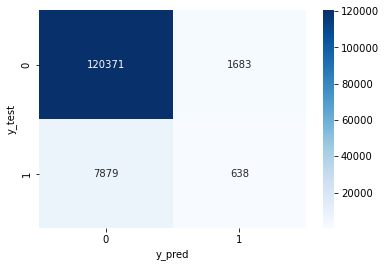

In [133]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True, fmt = '.0f', cmap = plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')

plt.show()

In [134]:
y_train.value_counts(normalize = True)

good_bad
0    0.934773
1    0.065227
Name: proportion, dtype: float64

# 8. Modelling 2

In [137]:
y_pred = model.predict_proba(X_test)[:,1]

In [138]:
(y_pred > 0.5).astype(int)

array([0, 0, 0, ..., 0, 0, 1])

(array([116276.,   6097.,   2977.,   1660.,   1060.,    753.,    569.,
           490.,    419.,    270.]),
 array([5.58654269e-04, 9.64779923e-02, 1.92397330e-01, 2.88316668e-01,
        3.84236006e-01, 4.80155344e-01, 5.76074682e-01, 6.71994020e-01,
        7.67913358e-01, 8.63832696e-01, 9.59752034e-01]),
 <BarContainer object of 10 artists>)

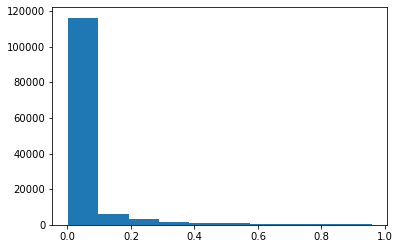

In [139]:
plt.hist(y_pred)

In [141]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [142]:
thresholds

array([1.95975203e+00, 9.59752034e-01, 9.45730715e-01, ...,
       1.26843059e-03, 6.23945554e-04, 5.58654269e-04])

In [143]:
# YOUDEN J-STATISTIC
j = tpr - fpr

ix = np.argmax(j)
best_thresh = thresholds[ix]
best_thresh

0.06207660304446486

In [145]:
y_pred = model.predict_proba(X_test)[:,1]
y_pred = (y_pred > 0.066).astype(int)

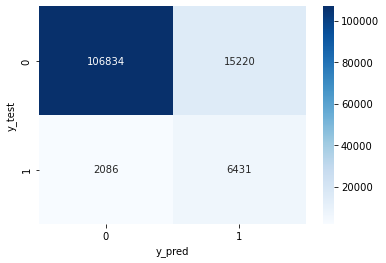

In [146]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True, fmt = '.0f', cmap = plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')

plt.show()

In [147]:
model.coef_

array([[ 0.01584933, -0.03066572, -0.00101928,  0.05656526,  0.27952816,
        -0.20997279]])

In [149]:
df_coeff = pd.DataFrame(model.coef_, columns = X_train.columns)
df_coeff

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,0.015849,-0.030666,-0.001019,0.056565,0.279528,-0.209973


In [150]:
X_train.head()

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
381958,36,2,351.0,71.0,67.0,67.0
135266,60,5,259.0,76.0,70.0,67.0
451467,60,10,302.0,85.0,78.0,78.0
596565,60,0,339.0,81.0,67.0,67.0
72200,60,8,221.0,74.0,67.0,67.0


In [ ]:
# Term positif, semakin tinggi jangka waktu untuk melunasi maakin besar peluang gagal bayarnya
# employement length, semakin tinggi maka kemungkinan gagal bayar semakin rendah
# mths_secl, jika umur credit line tua, peluang gagal bayar semakin rendah
# issue_date, kalau uang yang dicairkan uda lama, semakin tinggi peluang gagal bayarnya
# since_last_pymnt, jika bulan pembayaran terakhir sudah sangat lama, maka kemungkinan gagal bayar tinggi
# last_credit_pull, Nan